# Titanic Kaggle Competition

Some useful tutorials on Kaggle:
- [Feature undersatdning from plots](https://www.kaggle.com/saisivasriram/titanic-feature-understanding-from-plots)
- [Detailed ensemble learning](https://www.kaggle.com/littleraj30/detailed-ensemble-v-s-other-model-on-titanic)

Import libraries

In [1]:
# systems
from pathlib import Path
# data handling
import pandas as pd
import numpy as np
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning

In [2]:
path = Path('../data/')
list(path.glob('*'))

[PosixPath('../data/train.csv'),
 PosixPath('../data/test.csv'),
 PosixPath('../data/gender_submission.csv'),
 PosixPath('../data/titanic.zip')]

### Data Exploration

Training data

In [26]:
train_path = path.joinpath('train.csv')
train_data = pd.read_csv(train_path)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

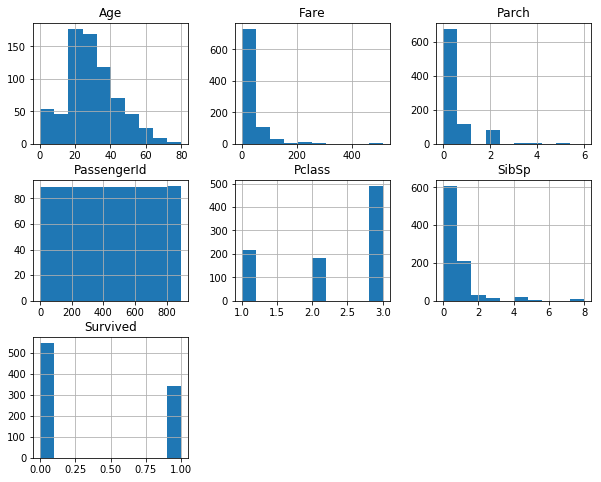

In [6]:
train_data.hist(figsize=(10,8));

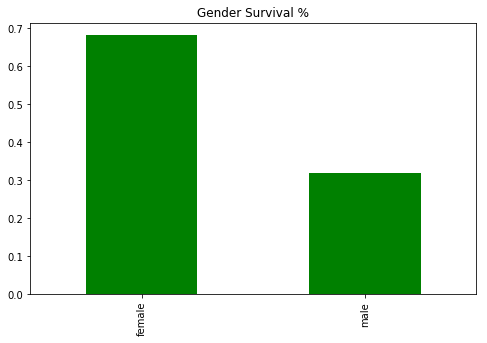

In [63]:
plt.figure(figsize=(8,5))
(train_data.Sex[train_data.Survived == 1]
             .value_counts(normalize=True)
             .plot(kind='bar', color='G'))
plt.title('Gender Survival %');

Aim to remove or replace null values, consider the importance of a feature. Does it have a relevance on whether someone would survive the Titanic? Having seen the movie the obvious features to keep for a successful prediction would be gender and age e.g. women and children survive.

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

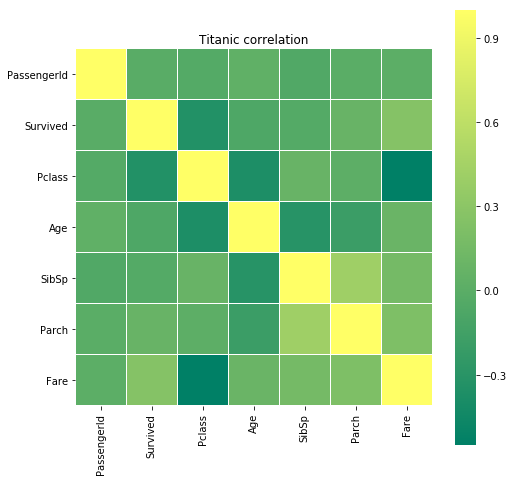

In [43]:
corr = train_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, vmax=1, square=True, cmap='summer', linewidths=0.1)
plt.title('Titanic correlation');

The box plot visualises survival chance of 1st, 2nd and 3rd class passengers based on age. 

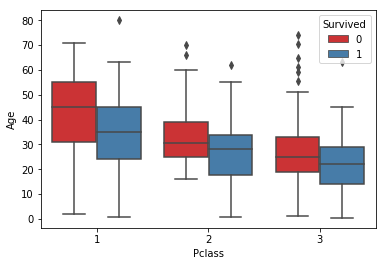

In [55]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_data, palette='Set1');

Kernel Density Estimation (KDE) visualisation for age within class. Kernel density from [pandas.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html) is a non-parametric smoothing technique which uses Gaussian kernels and includes automatic bandwidth determination. [A useful explanation with interactive javascript plots](https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28).

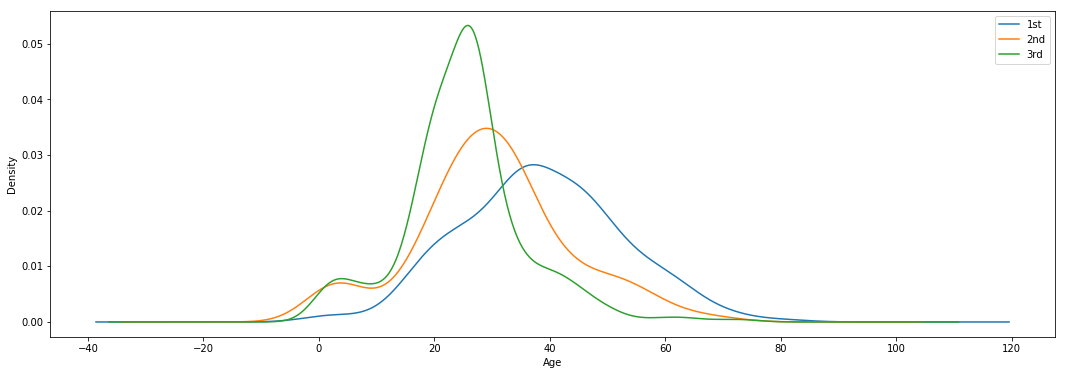

In [16]:
fig = plt.figure(figsize=(18,6))
for x in [1,2,3]:
    train_data.Age[train_data.Pclass == x].plot(kind='kde')
plt.legend(('1st', '2nd', '3rd'))
plt.xlabel('Age')
plt.show()
train_data.plot(kind)

In [25]:
print(' Youngest: ', min(train_data.Age), '\n', 'Oldest: ', max(train_data.Age))

 Youngest:  0.42 
 Oldest:  80.0


In [10]:
for num, i in enumerate(range(1,4)):
    age = train_data.groupby('Pclass').get_group(i).Age.mean()
    print('class', num+1, 'mean age:', age)

class 1 mean age: 38.233440860215055
class 2 mean age: 29.87763005780347
class 3 mean age: 25.14061971830986


Fill age according to Pclass mean age. [Pandas guidance on missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html), [Pandas guidance on the transform function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html), with lambda

In [11]:
train_data.groupby(['Pclass', 'Survived'])['Age'].mean()

Pclass  Survived
1       0           43.695312
        1           35.368197
2       0           33.544444
        1           25.901566
3       0           26.555556
        1           20.646118
Name: Age, dtype: float64

In [12]:
train_data['Age']=(train_data
                   .groupby(['Pclass','Survived'])['Age']
                   .transform(lambda x:x.fillna(x.mean())))

The transform function is passed over a single column of a single group.

In [13]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fill in the null values in Embarked feature.
C = Cherbourg, Q = Queenstown, S = Southampton

In [58]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
train_data.groupby([])